In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
state_df = pd.read_excel("/content/State_of_data_BR_2023_Kaggle - df_survey_2023.xlsx")

In [ ]:
state_df

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_e ', 'experiencia_profissional_prejudicada')","('P1_e_1 ', 'Não acredito que minha experiência profissional seja afetada')","('P1_e_2 ', 'Experiencia prejudicada devido a minha Cor Raça Etnia')","('P1_e_3 ', 'Experiencia prejudicada devido a minha identidade de gênero')",...,"('P8_d_3 ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')","('P8_d_4 ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')","('P8_d_5 ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')","('P8_d_6 ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')","('P8_d_7 ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.')","('P8_d_8 ', 'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.')","('P8_d_9 ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_10 ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_11 ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')","('P8_d_12 ', 'Treinando e aplicando LLM's para solucionar problemas de negócio.')"
0,001b2d1qtli8t9z7oqgdhj001b2d4i0g,31,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0026aa3fwd78u0026asg7456tfkjg2cs,30,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00r21rb9pusd1b0v7ew00r21rw3dy69w,37,35-39,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...",0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00urm3jf2cek12w6ygue00urm3jzd17j,22,22-24,Masculino,Preta,Não,Não acredito que minha experiência profissiona...,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00v0az4g792svil00vn6y1kfm9hq8vy9,34,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5288,zyg9519671iqrgy93qzyg95183k8ix5f,34,30-34,Masculino,Preta,Não,Não acredito que minha experiência profissiona...,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5289,zyppgxzxko25qkgwsbrgpzyppgxzxs81,32,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5290,zysl5f50cnz3r0cbe6t2zysrxbzfsrng,25,25-29,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5291,zyt2656c9e1becxp457zyt26566dsng8,31,30-34,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
state_df.columns

Index(['('P0', 'id')', '('P1_a ', 'Idade')', '('P1_a_1 ', 'Faixa idade')',
       '('P1_b ', 'Genero')', '('P1_c ', 'Cor/raca/etnia')',
       '('P1_d ', 'PCD')', '('P1_e ', 'experiencia_profissional_prejudicada')',
       '('P1_e_1 ', 'Não acredito que minha experiência profissional seja afetada')',
       '('P1_e_2 ', 'Experiencia prejudicada devido a minha Cor Raça Etnia')',
       '('P1_e_3 ', 'Experiencia prejudicada devido a minha identidade de gênero')',
       ...
       '('P8_d_3 ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')',
       '('P8_d_4 ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')',
       '('P8_d_5 ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')',
       '('P8_d_6 ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento,

analise da correlação de trabalho por genero e etnia

In [ ]:
cols = [
    "('P1_b ', 'Genero')", "('P1_c ', 'Cor/raca/etnia')",
    "('P2_a ', 'Qual sua situação atual de trabalho?')", "('P2_f ', 'Cargo Atual')",
    "('P2_g ', 'Nivel')", "('P2_h ', 'Faixa salarial')",
    "('P1_i_2 ', 'Regiao onde mora')", "('P1_l ', 'Nivel de Ensino')",
    "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')",
    "('P2_d ', 'Gestor?')", "('P2_r ', 'Atualmente qual a sua forma de trabalho?')"
]

st_df = state_df[cols].copy()
st_df.columns = ['genero', 'etnia', 'situacao_trabalho', 'cargo', 'nivel',
                 'faixa_salarial', 'regiao', 'nivel_ensino', 'exp_dados',
                 'gestor', 'modelo_trabalho']

# Limpeza de dados
st_df = st_df.dropna()
st_df = st_df[st_df['situacao_trabalho'] != 'outros']
st_df = st_df[st_df['genero'].isin(['Masculino', 'Feminino'])]

# Criar categorias agregadas para cargos
cargos_principais = {
    'Cientista de Dados/Data Scientist': 'Cientista de Dados',
    'Engenheiro de Dados/Data Engineer': 'Engenheiro de Dados',
    'Analista de Dados/Data Analyst': 'Analista de Dados',
    'Analista de BI/BI Analyst': 'Analista de BI'
}
st_df['cargo_agrupado'] = st_df['cargo'].map(cargos_principais).fillna('Outros')

Relação geral de situação de trabalho

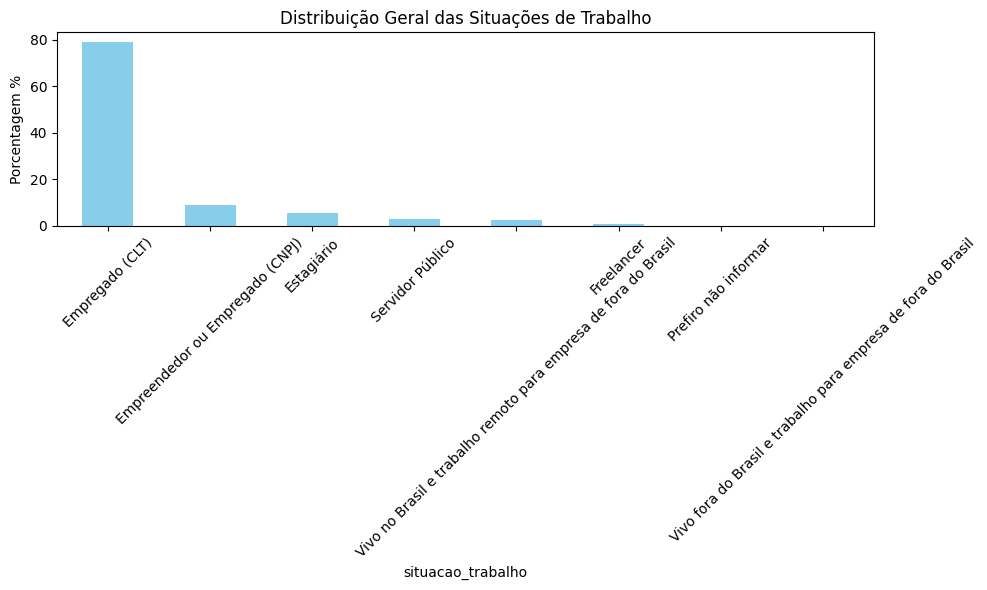

In [ ]:
plt.figure(figsize=(10,6))
#conta a frequenta absoluta de cada categoria de situação de trabalho
situacao_count = st_df['situacao_trabalho'].value_counts(normalize=True) * 100
situacao_count.plot(kind='bar', color='skyblue')
plt.title('Distribuição Geral das Situações de Trabalho')
plt.ylabel('Porcentagem %')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

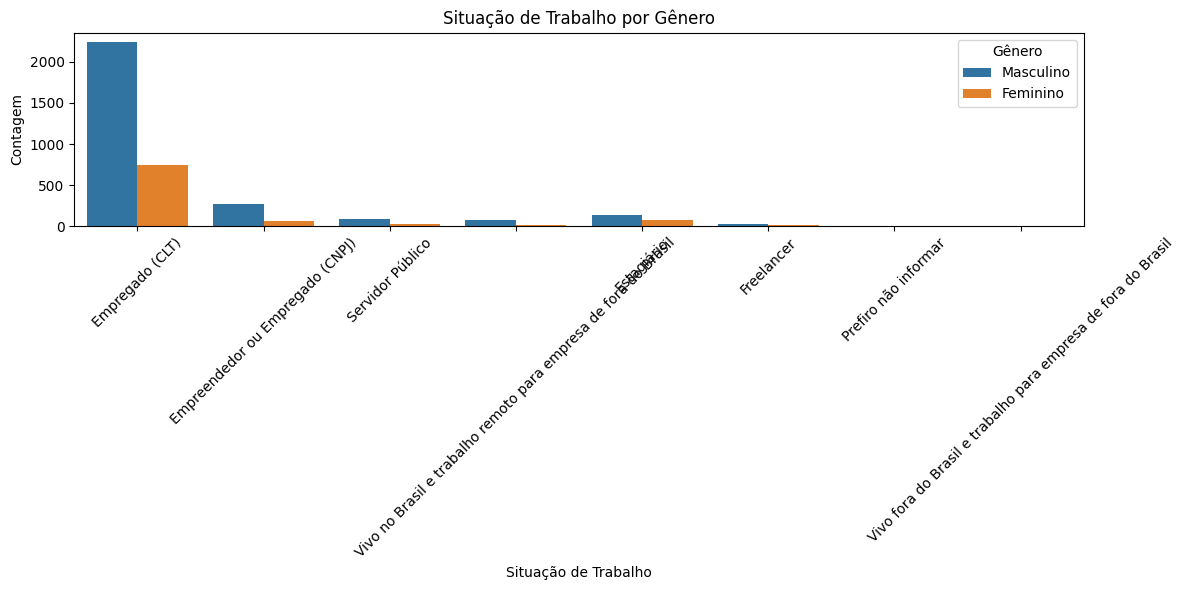

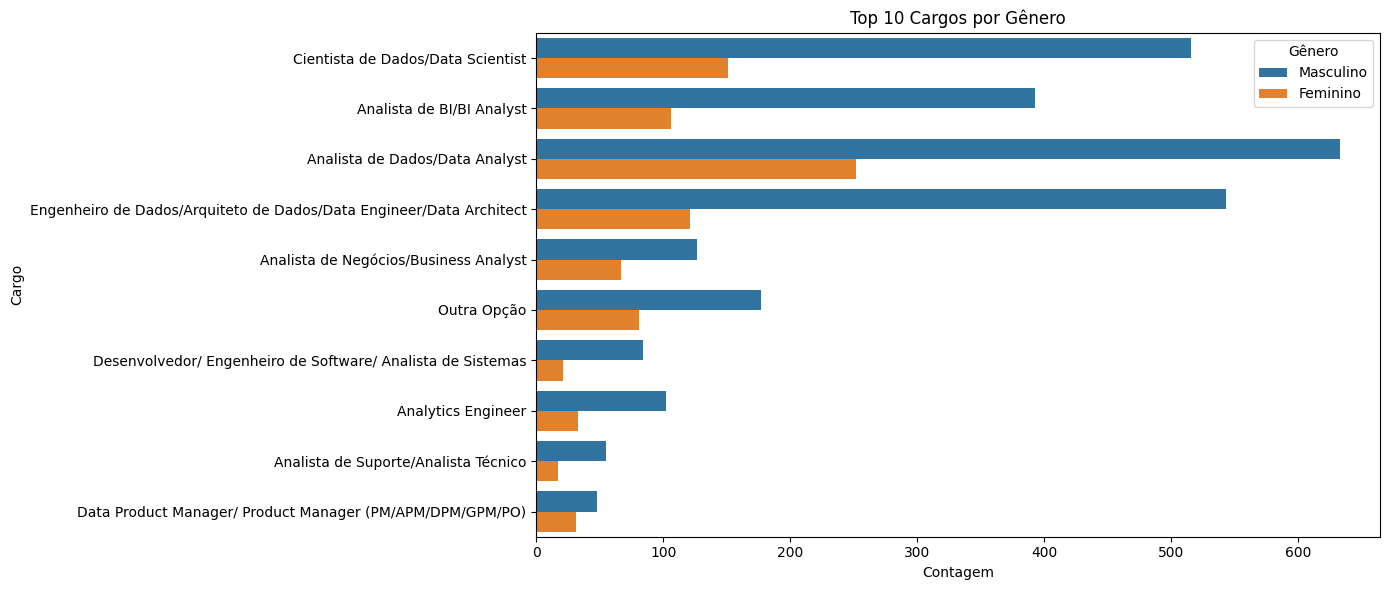

In [ ]:
# Situação de trabalho por gênero
plt.figure(figsize=(12,6))
sns.countplot(data=st_df, x='situacao_trabalho', hue='genero')
plt.title('Situação de Trabalho por Gênero')
plt.ylabel('Contagem')
plt.xlabel('Situação de Trabalho')
plt.xticks(rotation=45)
plt.legend(title='Gênero')
plt.tight_layout()
plt.show()

# Cargos por gênero top 10 cargos
top_cargos = st_df['cargo'].value_counts().nlargest(10).index
#criado um dataframe com os dados dos top 10 cargos mais frequentes
st_df_top = st_df[st_df['cargo'].isin(top_cargos)]

plt.figure(figsize=(14,6))
sns.countplot(data=st_df_top, y='cargo', hue='genero')
plt.title('Top 10 Cargos por Gênero')
plt.xlabel('Contagem')
plt.ylabel('Cargo')
plt.legend(title='Gênero')
plt.tight_layout()
plt.show()

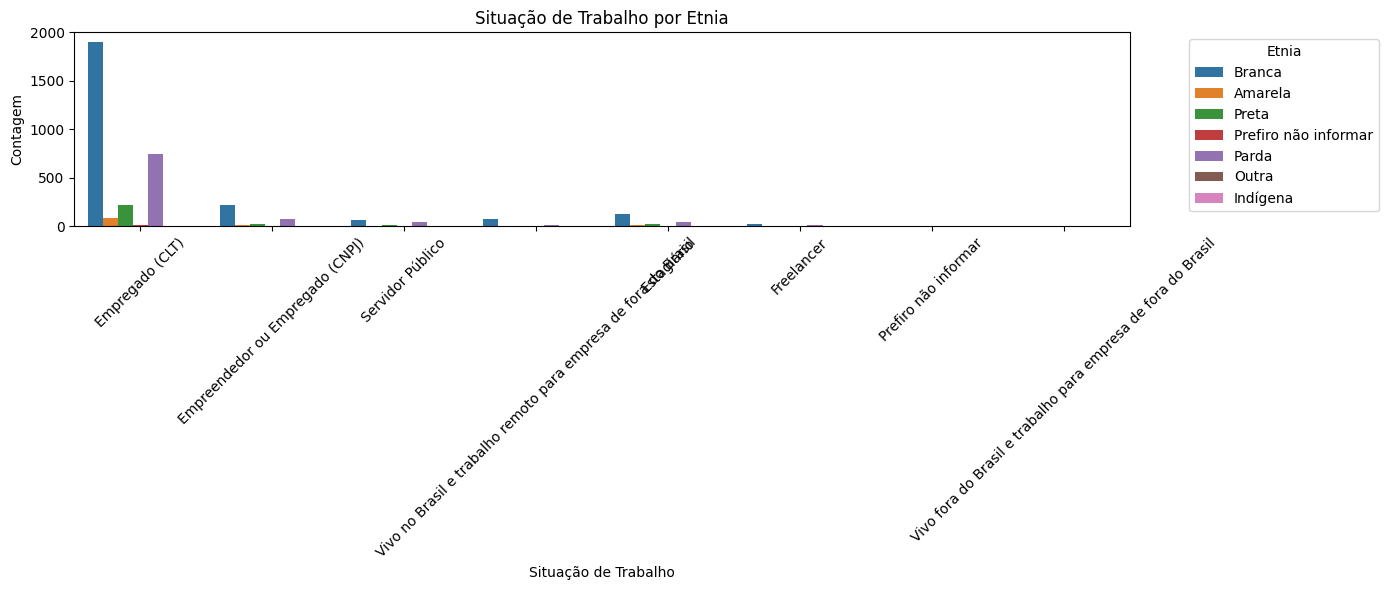

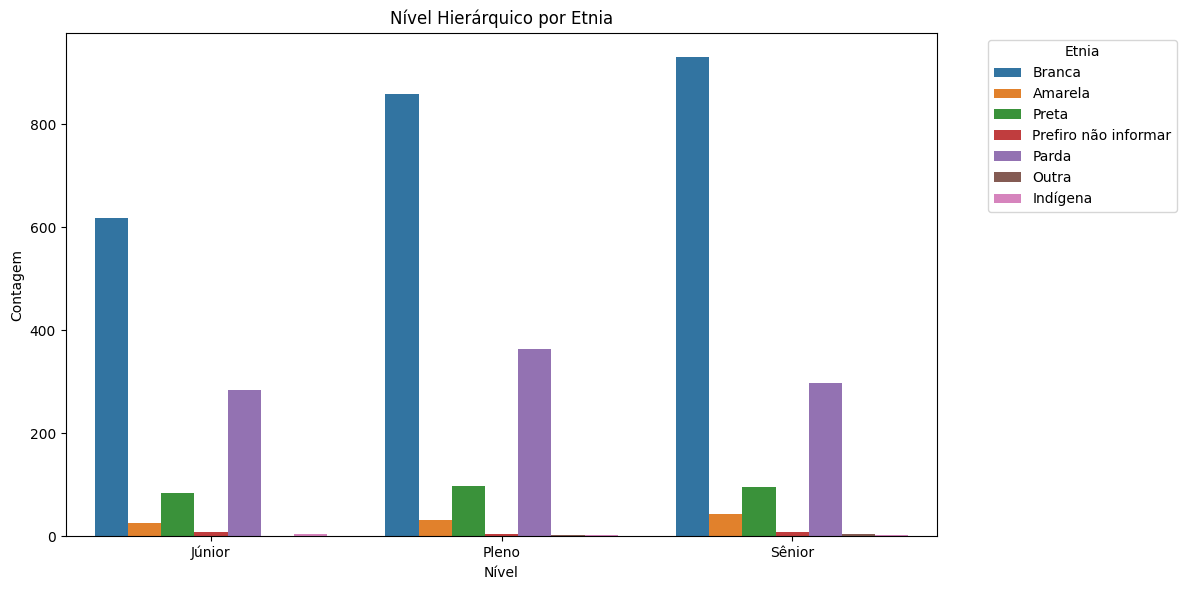

In [ ]:
# Situação de trabalho por etnia
plt.figure(figsize=(14,6))
#Cada barra representa uma categoria de situação de trabalho
sns.countplot(data=st_df, x='situacao_trabalho', hue='etnia')
plt.title('Situação de Trabalho por Etnia')
plt.ylabel('Contagem')
plt.xlabel('Situação de Trabalho')
plt.xticks(rotation=45)
plt.legend(title='Etnia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Níveis hierárquicos por etnia
plt.figure(figsize=(12,6))
sns.countplot(data=st_df, x='nivel', hue='etnia', order=['Júnior', 'Pleno', 'Sênior'])
plt.title('Nível Hierárquico por Etnia')
plt.ylabel('Contagem')
plt.xlabel('Nível')
plt.legend(title='Etnia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

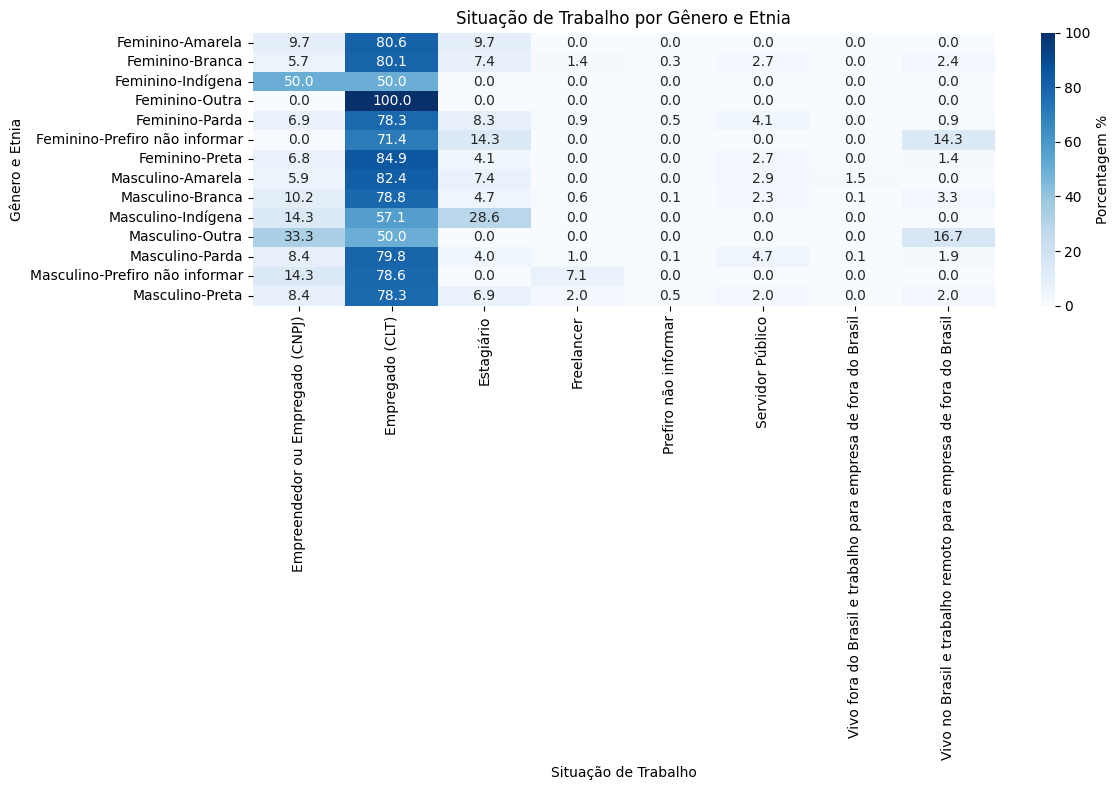

In [ ]:
# Criar tabela cruzada
cross_tab = pd.crosstab(
    index=[st_df['genero'], st_df['etnia']],
    columns=st_df['situacao_trabalho'],
    normalize='index'
) * 100

# Visualizar tabela
cross_tab

# Heatmap da situação de trabalho por gênero e etnia
plt.figure(figsize=(12,8))
sns.heatmap(
    cross_tab,
    annot=True,
    fmt='.1f',
    cmap='Blues',
    cbar_kws={'label': 'Porcentagem %'})
plt.title('Situação de Trabalho por Gênero e Etnia')
plt.ylabel('Gênero e Etnia')
plt.xlabel('Situação de Trabalho')
plt.tight_layout()
plt.show()

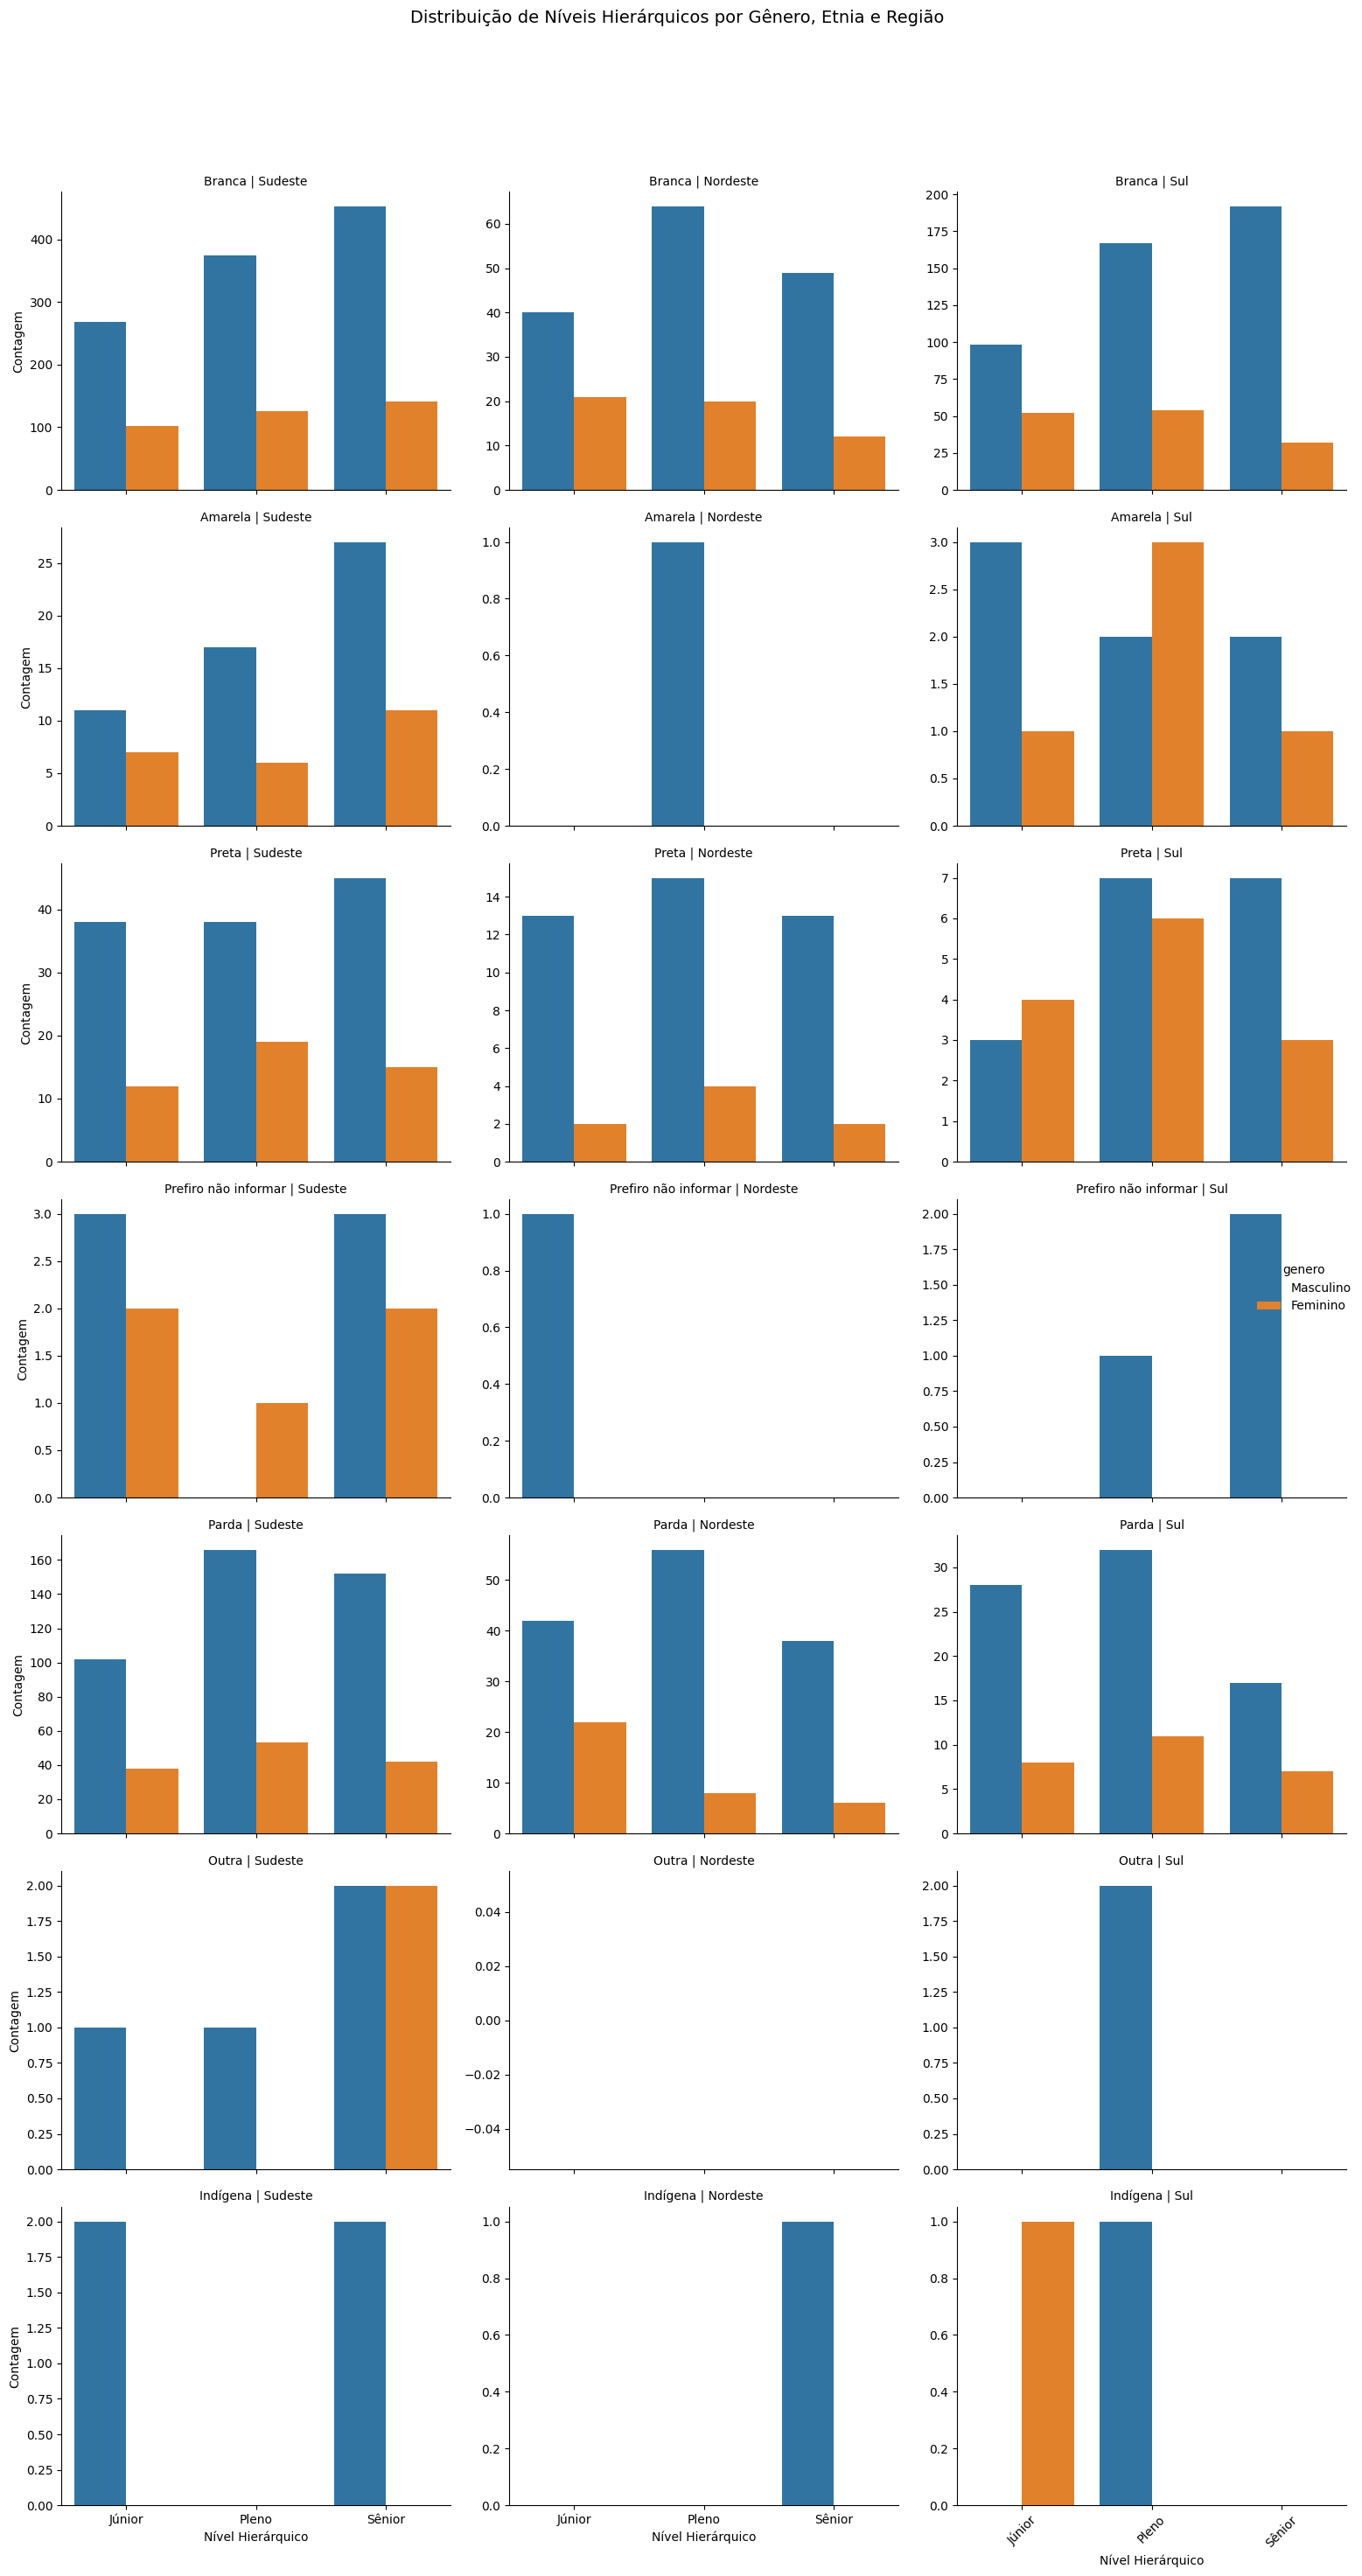

In [ ]:
# 4.2 Nível hierárquico por gênero, etnia e região
# Isolar as 3 regiões com maior número de respostas para análise.
top_regioes = st_df['regiao'].value_counts().nlargest(3).index
#conta a frequência de cada região dentro do dataframe.
st_df_regioes = st_df[st_df['regiao'].isin(top_regioes)]

g = sns.catplot(
    data=st_df_regioes,
    x='nivel',
    hue='genero',
    col='regiao',
    row='etnia',
    kind='count',
    height=4,
    aspect=1.2,
    order=['Júnior', 'Pleno', 'Sênior'],
    sharey=False
)
g.set_axis_labels("Nível Hierárquico", "Contagem")
g.set_titles("{row_name} | {col_name}")
g.fig.suptitle('Distribuição de Níveis Hierárquicos por Gênero, Etnia e Região', y=1.05, fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analise salarial de genero por profissão

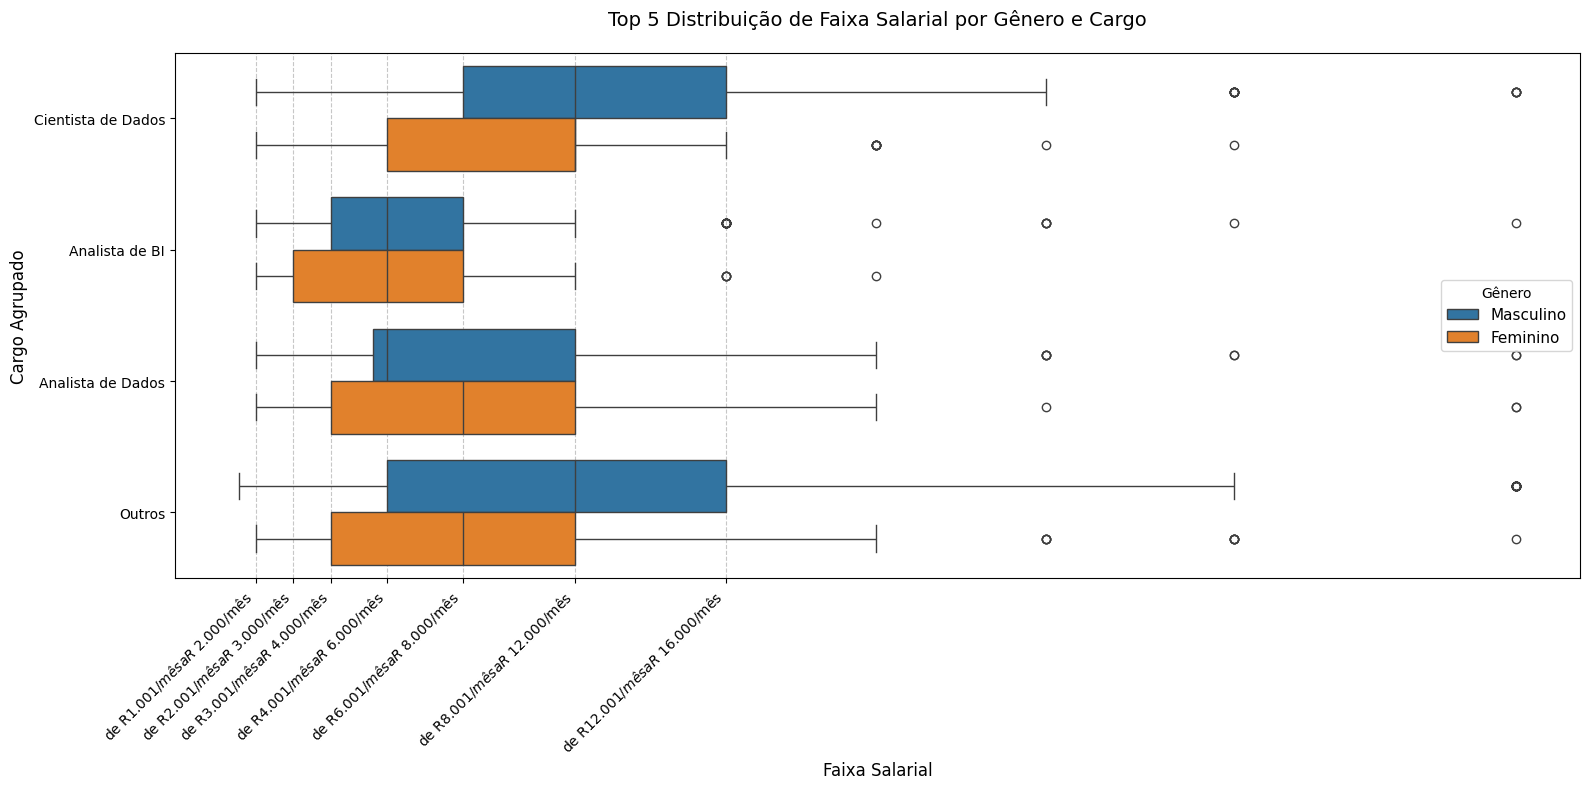

In [ ]:
top_5_cargos = st_df['cargo_agrupado'].value_counts().nlargest(5).index
st_df_salario = st_df[st_df['cargo_agrupado'].isin(top_5_cargos)]

# Ordenação da salariais
ordem_salario = [
    'de R$ 1.001/mês a R$ 2.000/mês',
    'de R$ 2.001/mês a R$ 3.000/mês',
    'de R$ 3.001/mês a R$ 4.000/mês',
    'de R$ 4.001/mês a R$ 6.000/mês',
    'de R$ 6.001/mês a R$ 8.000/mês',
    'de R$ 8.001/mês a R$ 12.000/mês',
    'de R$ 12.001/mês a R$ 16.000/mês',
    'Acima de R$ 16.000/mês'
]

# coluna numerica com as faixas salariais
def faixa_media_salario(faixa):
    if faixa == 'Acima de R$ 16.000/mês':
        return 18000
    elif 'a R$' in faixa:
        valores = faixa.replace('de R$', '').replace('/mês', '').split(' a R$ ')
        return (float(valores[0].replace('.','').replace(',','.')) + float(valores[1].replace('.','').replace(',','.'))) / 2
    else:
        return None

# Aplicar a conversão
st_df_salario['salario_medio'] = st_df_salario['faixa_salarial'].apply(faixa_media_salario)

# criação do boxplot
plt.figure(figsize=(16,8))
sns.boxplot(
    data=st_df_salario,
    x='salario_medio',
    y='cargo_agrupado',
    hue='genero',
    orient='h'
)

# Configurar os rótulos do eixo x para mostrar as faixas originais
faixas_unicas = st_df_salario['faixa_salarial'].unique()
plt.xticks(
    ticks=[faixa_media_salario(f) for f in ordem_salario if f in faixas_unicas],
    labels=[f for f in ordem_salario if f in faixas_unicas],
    rotation=45,
    ha='right'
)

plt.title('Top 5 Distribuição de Faixa Salarial por Gênero e Cargo', pad=20, fontsize=14)
plt.xlabel('Faixa Salarial', fontsize=12)
plt.ylabel('Cargo Agrupado', fontsize=12)
plt.legend(title='Gênero', fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-16-029c50a64461>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pcd['pcd'] = df_pcd['pcd'].str.strip()
<ipython-input-16-029c50a64461>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pcd['regiao'] = df_pcd['regiao'].str.strip()
<ipython-input-16-029c50a64461>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pcd_por_regiao.index, y=p

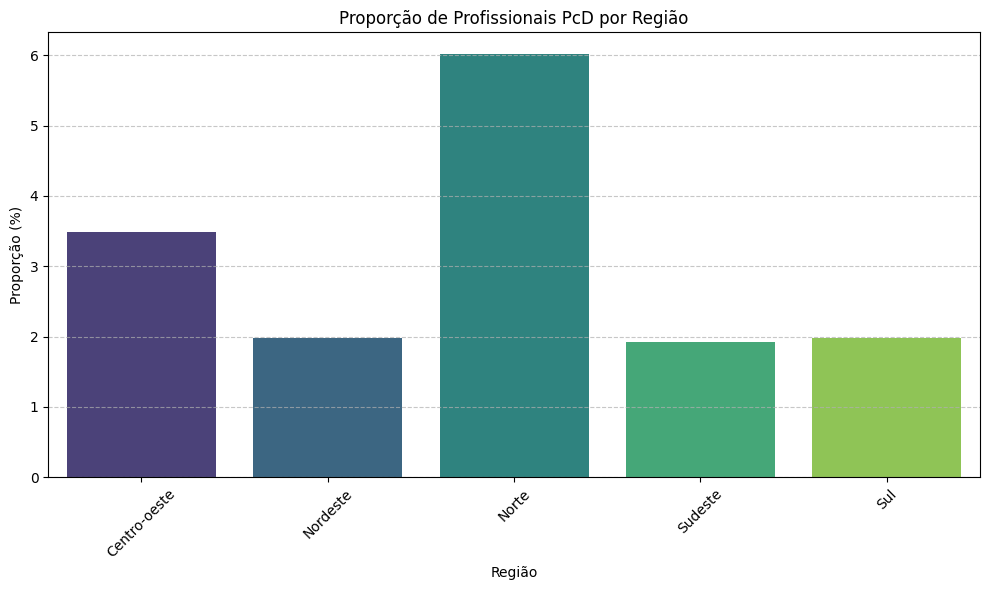

              Não PcD (%)  Prefiro não informar   PcD (%)
regiao                                                   
Norte           93.975904              0.000000  6.024096
Centro-oeste    95.348837              1.162791  3.488372
Sul             97.710718              0.312175  1.977107
Nordeste        97.532895              0.493421  1.973684
Sudeste         97.636306              0.441223  1.922471


In [ ]:
# Cópia do dataframe original com as colunas de interesse
df_pcd = state_df[["('P1_d ', 'PCD')", "('P1_i_2 ', 'Regiao onde mora')"]].copy()
df_pcd.columns = ['pcd', 'regiao']

# Remove valores nulos e normaliza os textos
df_pcd = df_pcd.dropna()
df_pcd['pcd'] = df_pcd['pcd'].str.strip()
df_pcd['regiao'] = df_pcd['regiao'].str.strip()

# Calcula proporção de PcD por região
pcd_por_regiao = df_pcd.groupby('regiao')['pcd'].value_counts(normalize=True).unstack().fillna(0) * 100

# Renomeia colunas para clareza
pcd_por_regiao.columns.name = None
pcd_por_regiao = pcd_por_regiao.rename(columns={'Sim': 'PcD (%)', 'Não': 'Não PcD (%)'})

# Visualização
plt.figure(figsize=(10,6))
sns.barplot(x=pcd_por_regiao.index, y=pcd_por_regiao['PcD (%)'], palette='viridis')
plt.title('Proporção de Profissionais PcD por Região')
plt.xlabel('Região')
plt.ylabel('Proporção (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Exibe os dados para inserir no relatório
print(pcd_por_regiao.sort_values(by='PcD (%)', ascending=False))


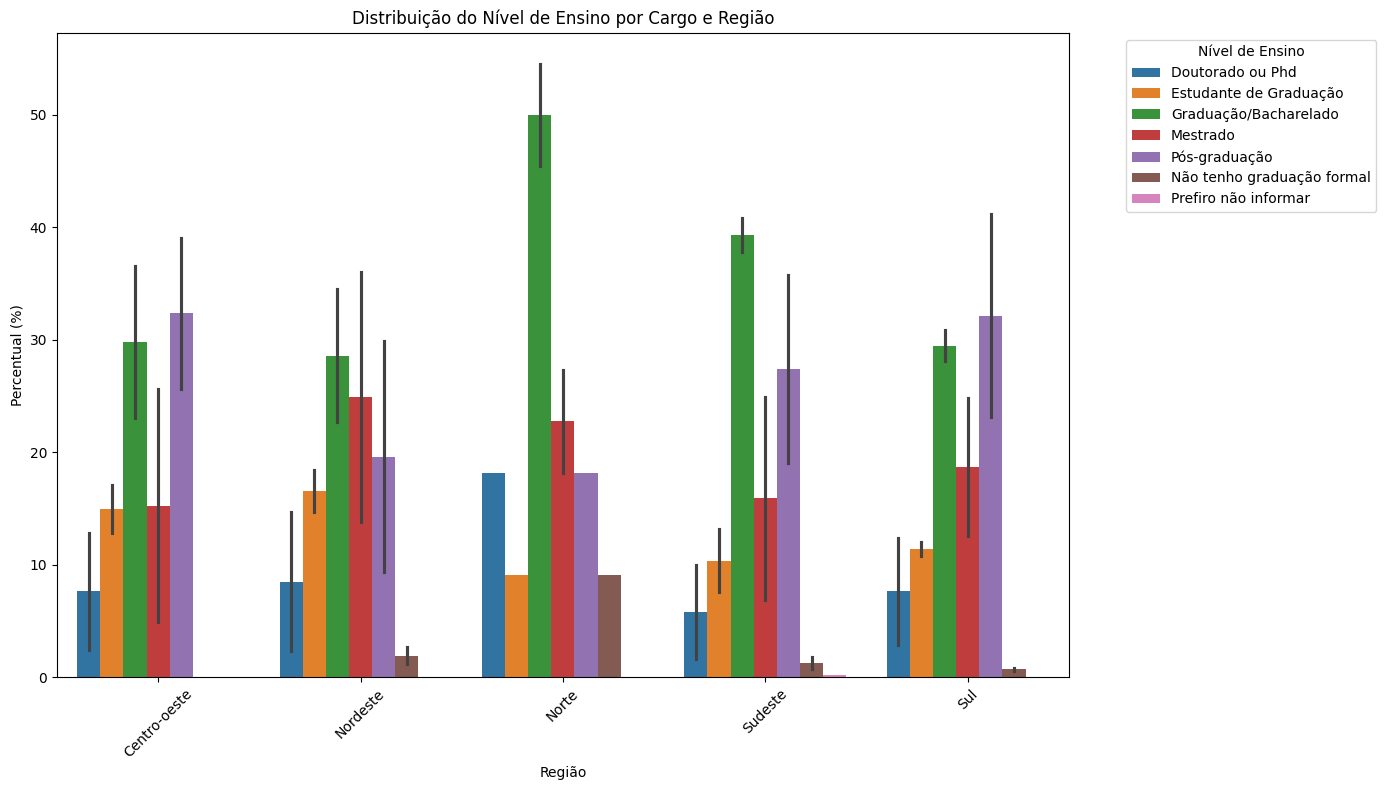

,regiao,cargo_simplificado,nivel_ensino,contagem,percentual
4,Centro-oeste,Analista de Dados,Pós-graduação,16,39.024390
2,Centro-oeste,Analista de Dados,Graduação/Bacharelado,15,36.585366
1,Centro-oeste,Analista de Dados,Estudante de Graduação,7,17.073171
3,Centro-oeste,Analista de Dados,Mestrado,2,4.878049
0,Centro-oeste,Analista de Dados,Doutorado ou Phd,1,2.439024
8,Centro-oeste,Cientista de Dados,Mestrado,10,25.641026
9,Centro-oeste,Cientista de Dados,Pós-graduação,10,25.641026
7,Centro-oeste,Cientista de Dados,Graduação/Bacharelado,9,23.076923
5,Centro-oeste,Cientista de Dados,Doutorado ou Phd,5,12.820513
6,Centro-oeste,Cientista de Dados,Estudante de Graduação,5,12.820513


In [ ]:
# Filtrar cargos principais
cargos_foco = [
    'Cientista de Dados/Data Scientist',
    'Engenheiro de Dados/Data Engineer',
    'Analista de Dados/Data Analyst'
]
df_ensino = st_df[st_df['cargo'].isin(cargos_foco)].copy()

# Simplificar os nomes dos cargos
cargos_simplificados = {
    'Cientista de Dados/Data Scientist': 'Cientista de Dados',
    'Engenheiro de Dados/Data Engineer': 'Engenheiro de Dados',
    'Analista de Dados/Data Analyst': 'Analista de Dados'
}
df_ensino['cargo_simplificado'] = df_ensino['cargo'].map(cargos_simplificados)

# Remover entradas faltantes
df_ensino = df_ensino.dropna(subset=['regiao', 'nivel_ensino'])

# Contar o número de pessoas por (região, cargo, nível de ensino)
tabela = (
    df_ensino
    .groupby(['regiao', 'cargo_simplificado', 'nivel_ensino'])
    .size()
    .reset_index(name='contagem')
)

# Calcular a porcentagem dentro de cada grupo (região + cargo)
tabela['percentual'] = (
    tabela
    .groupby(['regiao', 'cargo_simplificado'])['contagem']
    .transform(lambda x: 100 * x / x.sum())
)

# Visualização: gráfico empilhado
plt.figure(figsize=(14,8))
sns.barplot(
    data=tabela,
    x='regiao',
    y='percentual',
    hue='nivel_ensino'
)
plt.title('Distribuição do Nível de Ensino por Cargo e Região')
plt.xlabel('Região')
plt.ylabel('Percentual (%)')
plt.legend(title='Nível de Ensino', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Opcional: exibir os dados em tabela
tabela.sort_values(['regiao', 'cargo_simplificado', 'percentual'], ascending=[True, True, False]).head(10)
